In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#import iris set
iris = load_iris()
#print(iris)
#Los datos tienen 4 secciones:
#[longitud-sépalo, ancho-sepalo, longitud-petalo,ancho-petalo]

<h2>Separación del dataset</h2>
Lo dividiremos en <b>80%</b> para el <b><em>training</em></b><br>
Y el <b>20%</b> restante serán las <b><em>pruebas</em></b>

In [81]:
#Separación del dataset
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state=42, stratify=iris.target
)

X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [82]:
#Inicialización de los pesos
X = iris.data
n_features = X.shape[1]
#print(n_features) Aquí podemos ver que tenemos 4 features
'''
theta_Setosa = np.random.rand(n_features,1)
theta_Versicolor = np.random.rand(n_features,1)
theta_Virginica = np.random.rand(n_features,1)
'''
n_classes = 3
theta = np.random.rand(n_features, n_classes)
learning_rate = 0.1
n_epochs = 3000

In [83]:
#Creación del One-Hot

def Crear_One_Hot_set(set):
    One_Hot_set=[]
    class_zero=[1,0,0]
    class_one=[0,1,0]
    class_two=[0,0,1]
    for number in set:
        if number == 0:
            One_Hot_set.append(class_zero)
        elif number == 1:
            One_Hot_set.append(class_one) 
        elif number == 2:
            One_Hot_set.append(class_two)

    return One_Hot_set


y_train_One_Hot = Crear_One_Hot_set(y_train)
y_test_One_Hot = Crear_One_Hot_set(y_test)

In [84]:
y_train_one_hot = np.array(Crear_One_Hot_set(y_train))
y_test_one_hot = np.array(Crear_One_Hot_set(y_test))

In [85]:
def cross_entropy(y_true, y_pred):
    """
    y_true: array de shape (m, n_clases) con one-hot vectors
    y_pred: array de shape (m, n_clases) con predicciones de softmax
    """
    m = y_true.shape[0]  # número de muestras
    # para evitar log(0), sumamos un pequeño epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # calcular loss para cada muestra
    loss_per_sample = -np.sum(y_true * np.log(y_pred), axis=1)
    # promedio sobre todas las muestras
    return np.mean(loss_per_sample)

In [86]:
def SoftMax(X_b, y_one_hot, theta, learning_rate, n_epochs):
    cost_history = []
    for epoch in range(n_epochs):
        # Forward pass
        Z = X_b @ theta
        exp_Z = np.exp(Z)
        softmax_pred = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

        # Cross-entropy loss
        loss = -np.mean(np.sum(y_one_hot * np.log(softmax_pred), axis=1))
        cost_history.append(loss)

        # Gradiente
        gradient = (X_b.T @ (softmax_pred - y_one_hot)) / X_b.shape[0]

        # Actualizar pesos
        theta = theta - learning_rate * gradient

    return theta, cost_history


In [87]:
theta_final, cost_history = SoftMax(X_train,y_train_One_Hot, theta, learning_rate, n_epochs)
print("Pérdida final:", cost_history[-1])

Pérdida final: 0.09743569307176081


In [88]:
# Logits sobre X_test
Z_test = X_test @ theta_final

# Softmax vectorizado para obtener probabilidades
def SoftMax_vectorized(Matriz_Z):
    exp_Z = np.exp(Matriz_Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

softmax_test = SoftMax_vectorized(Z_test)
print(softmax_test[:5])


[[9.91934356e-01 8.06564395e-03 1.38584226e-10]
 [1.53312652e-04 3.01281261e-01 6.98565426e-01]
 [2.09505530e-02 9.68672200e-01 1.03772471e-02]
 [1.58588726e-02 9.74261522e-01 9.87960546e-03]
 [9.95495319e-01 4.50468124e-03 4.22089384e-11]]


In [89]:
y_pred_test = np.argmax(softmax_test, axis=1)
print(y_pred_test[:10])
print(y_test[:10])  # para comparar con las etiquetas reales


[0 2 1 1 0 1 0 0 2 1]
[0 2 1 1 0 1 0 0 2 1]


In [90]:
accuracy = np.mean(y_pred_test == y_test)
print("Precisión en test:", accuracy)


Precisión en test: 1.0


In [91]:
# Calcular Z_test usando los pesos finales
Z_test = X_test @ theta_final

# Aplicar Softmax para obtener probabilidades
def softmax(Matriz_Z):
    exp_Z = np.exp(Matriz_Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

probabilidades_test = softmax(Z_test)

# Obtener la clase predicha (índice del mayor valor)
y_pred_test = np.argmax(probabilidades_test, axis=1)

# Comparar con y_test y calcular precisión
precision = np.mean(y_pred_test == y_test)
print("Precisión en test set:", precision)

#ver la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusión:\n", cm)


Precisión en test set: 1.0
Matriz de confusión:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


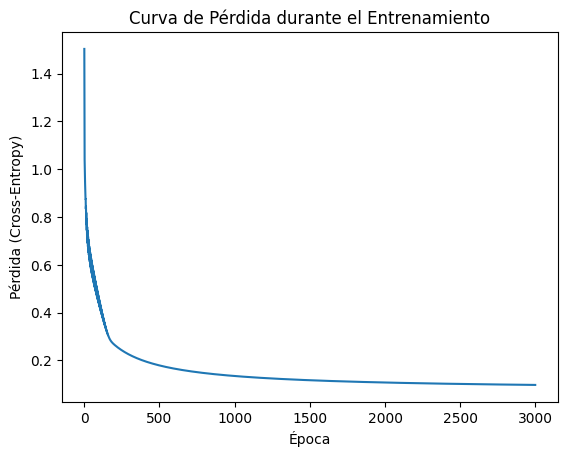

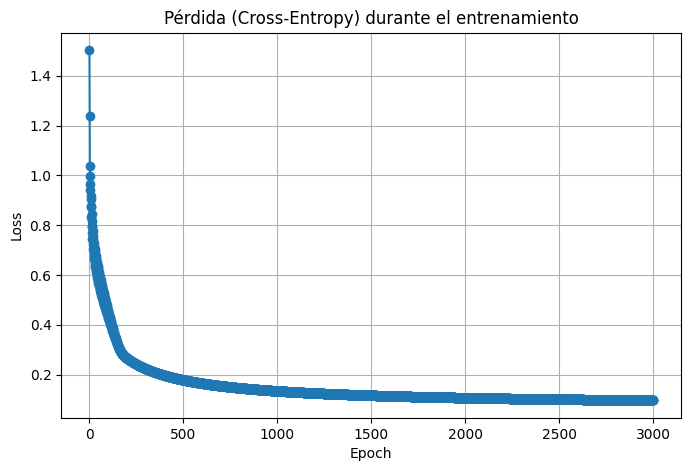

In [92]:


plt.plot(cost_history)
plt.xlabel("Época")
plt.ylabel("Pérdida (Cross-Entropy)")
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.show()

# Graficar pérdida vs epochs
plt.figure(figsize=(8,5))
plt.plot(cost_history, marker='o')
plt.title("Pérdida (Cross-Entropy) durante el entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

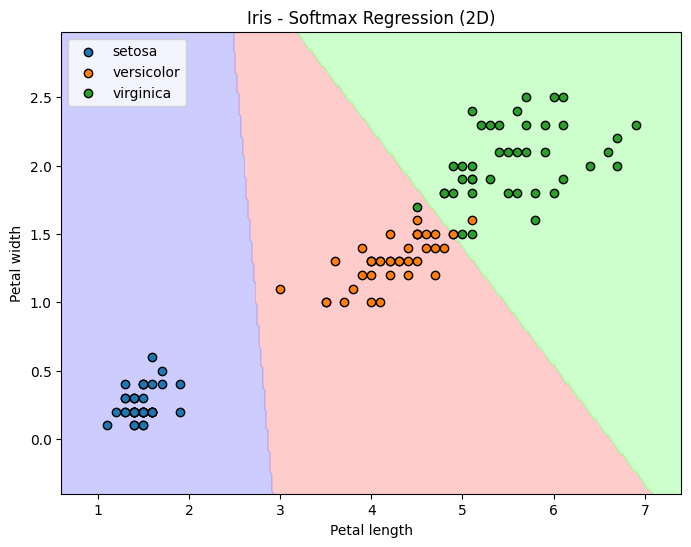

In [93]:
X_2D = X_train[:, [2,3]]  # petal length y petal width
y_2D = y_train
names = iris.target_names

mean_features = np.mean(X_train[:, [0,1]], axis=0)

h = 0.02
x_min, x_max = X_2D[:,0].min()-0.5, X_2D[:,0].max()+0.5
y_min, y_max = X_2D[:,1].min()-0.5, X_2D[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))

grid_points_2D = np.c_[xx.ravel(), yy.ravel()]


grid_full = np.hstack([
    np.tile(mean_features, (grid_points_2D.shape[0],1)),  # columnas 0 y 1
    grid_points_2D                                       # columnas 2 y 3
])


exp_Z = np.exp(grid_full @ theta_final)
softmax_grid = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
Z_pred = np.argmax(softmax_grid, axis=1).reshape(xx.shape)


colors = ('#AAAAFF','#FFAAAA','#AAFFAA')
cmap_light = ListedColormap(colors)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z_pred, cmap=cmap_light, alpha=0.6)

for i, name in enumerate(names):
    plt.scatter(X_2D[y_2D==i,0], X_2D[y_2D==i,1],
                label=name, edgecolor='k')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Iris - Softmax Regression (2D)")
plt.legend()
plt.show()